# Exploratory data analysis

http://patbaa.web.elte.hu/physdm/data/titanic.csv

On the link above you will find a dataset about the Titanic passengers. Your task is to explore the dataset.

Help for the columns:
 - SibSp - number of sibling/spouses on the ship
 - Parch - number of parent/children on the ship
 - Cabin - the cabin they slept in (if they had a cabin)
 - Embarked - harbour of entering the ship
 - Pclass - passenger class (like on trains)



#### 1. Load the above-linked csv file as a pandas dataframe. Check & plot if any of the columns has missing values. If they have, investigate if the missingness is random or not. 
Impute the missing values in a sensible way:
 - if only a very small percentage is missing, imputing with the column-wise mean makes sense, or also removing the missing rows makes sense
 - if in a row almost all the entries is missing, it worth to remove that given row
 - if a larger portion is missing from a column, usually it worth to encode that with a value that does not appear in the dataset (eg: -1). 
 
The imputing method affects different machine learning models different way, but now we are interested only in EDA, so try to keep as much information as possible!



#### 2. Create a heatmap which shows how many people survived and dies with the different Pclass variables. You need to create a table where the columns indicates if a person survived or not, the rows indicates the different Pclass and the cell values contains the number of people belonging the that given category. The table should be colored based on the value of the cells in the table.



#### 3. Create boxplots for each different Pclass. The boxplot should show the age distribution for the given Pclass. Plot all of these next to each other in a row to make it easier to compare!



#### 4. Calculate the correlation matrix for the numerical columns. Show it also as a heatmap described at the 1st task.

Which feature seems to play the most important role in surviving/not surviving? Explain how and why could that feature be important! 



#### 5. Create two plots which you think are meaningful. Interpret both of them. (Eg.: older people buy more expensive ticket? people buying more expensive ticket survive more? etc.)


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# Task 1

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# number of missing values per column
for column in list(df):
    print(column, df[f'{column}'].isna().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [4]:
# number of missing values per row
row_nas = df.isnull().sum(axis=1).tolist()

Too many rows to check "by hand", let's see if there are big values

In [5]:
print(max(row_nas))

2


No rows with more than two missing values, no reason to remove entire rows because of too many missing values

In [6]:
# encoding missing values in the Cabin and Embarked columns with -1
df_new = df
df_new['Cabin'] = df_new['Cabin'].fillna(-1)
df_new['Embarked'] = df_new['Embarked'].fillna(-1)

In [7]:
# dropping the rows where Age is missing since we have to do calculations with this feature in task 3
df_new = df_new[df_new['Age'].notna()]

In [8]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S


# Task 2

In [9]:
# creating the proper table for the heatmap
df2 = pd.DataFrame()

df2['Survived'] = [len(df_new[(df_new['Survived'] == 1) & (df_new['Pclass'] == 1)].index),
            len(df_new[(df_new['Survived'] == 1) & (df_new['Pclass'] == 2)].index),
            len(df_new[(df_new['Survived'] == 1) & (df_new['Pclass'] == 3)].index)]

df2['Dead'] = [len(df_new[(df_new['Survived'] == 0) & (df_new['Pclass'] == 1)].index),
            len(df_new[(df_new['Survived'] == 0) & (df_new['Pclass'] == 2)].index),
            len(df_new[(df_new['Survived'] == 0) & (df_new['Pclass'] == 3)].index)]

In [10]:
# starting the index of the table at 1 to represent the pclass values
df2.index = np.arange(1, len(df2)+1)

In [11]:
df2

,Survived,Dead
1,122,64
2,83,90
3,85,270


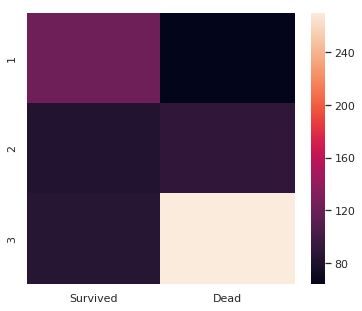

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(df2)

# Task 3

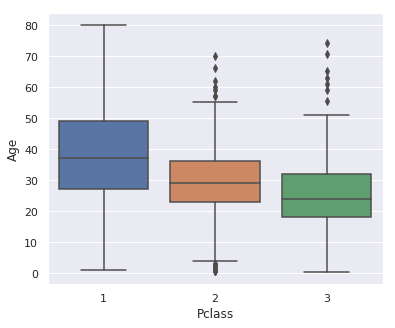

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Pclass', y='Age', data=df_new)

# Task 4

In [14]:
df_new.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


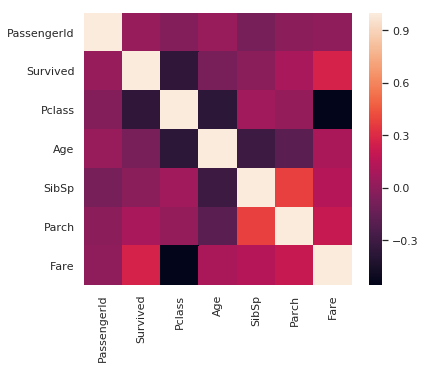

In [15]:
plt.figure(figsize=(6,5))
sns.heatmap(df_new.corr())

In [16]:
df_new.corr()['Survived']

PassengerId    0.029340
Survived       1.000000
Pclass        -0.359653
Age           -0.077221
SibSp         -0.017358
Parch          0.093317
Fare           0.268189
Name: Survived, dtype: float64

The number of siblings/spouses seems to play the biggest role in whether a person survived or didn't (assuming the values shown here are calculated with survival and not death). My guess is that a person with no family on the ship had better chance of surviving since he/she only had to take care of him or herself. And the chance of death might grow with the number of people he/she had as company. Although the Parch values are less correlated with the survival so this thought of family/company may be wrong

# Task 5

Text(0.5, 1.0, 'Fare distribution on the titanic')

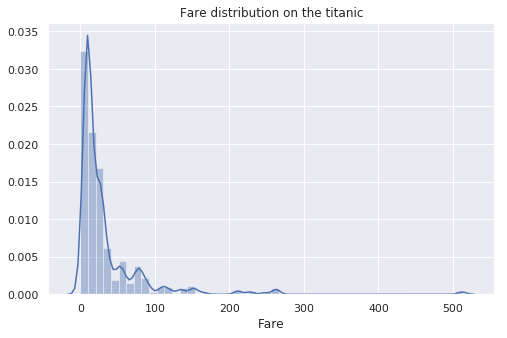

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Fare']).set_title('Fare distribution on the titanic')

It seems like the big majority of people payed less than the average fare prices.

Text(0.5, 1.0, 'Survival rate of genders')

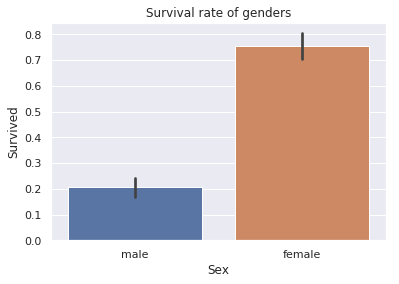

In [18]:
sns.barplot(x='Sex', y='Survived', data=df_new).set_title('Survival rate of genders')

Looks like the women outlived the men by much, let's look at the survival rate of genders per classes.

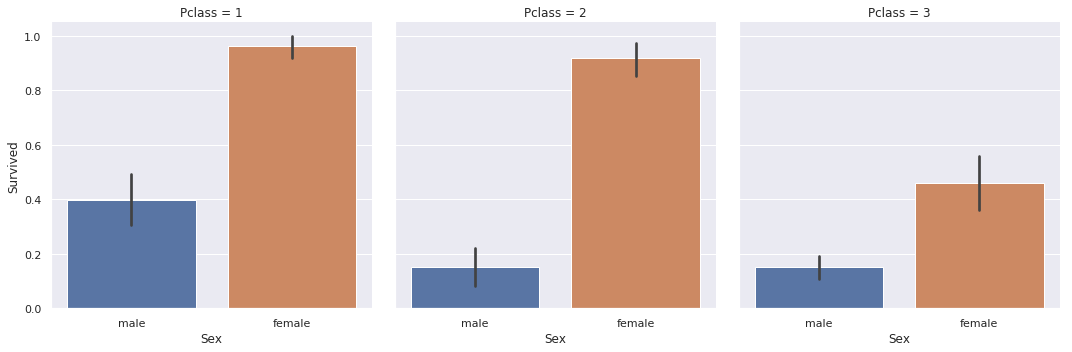

In [19]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_new, kind='bar')

The difference is still quite big, less in the third class. It's interesting that almost every women survived in the first two classes